In [127]:
import pandas as pd

In [128]:
total_data=pd.read_csv("../data/interim/eda_data.csv")

In [129]:
total_data.columns

Index(['date_occ', 'time_occ', 'area_name', 'rpt_dist_no', 'crm_cd_desc',
       'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'lat', 'lon'],
      dtype='object')

In [130]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433936 entries, 0 to 433935
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date_occ      433936 non-null  object 
 1   time_occ      433936 non-null  int64  
 2   area_name     433936 non-null  object 
 3   rpt_dist_no   433936 non-null  int64  
 4   crm_cd_desc   433936 non-null  object 
 5   mocodes       374863 non-null  object 
 6   vict_age      433936 non-null  int64  
 7   vict_sex      377464 non-null  object 
 8   vict_descent  377461 non-null  object 
 9   premis_desc   433651 non-null  object 
 10  weapon_desc   154873 non-null  object 
 11  status_desc   433936 non-null  object 
 12  location      433936 non-null  object 
 13  lat           433936 non-null  float64
 14  lon           433936 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 49.7+ MB


In [131]:
total_data.describe()

,time_occ,rpt_dist_no,vict_age,lat,lon
count,433936.000000,433936.000000,433936.000000,433936.000000,433936.000000
mean,1342.261801,807.326440,29.243091,33.978735,-118.063061
std,653.305824,582.410313,21.737410,1.613498,5.594830
min,1.000000,101.000000,0.000000,0.000000,-118.667600
25%,900.000000,327.000000,0.000000,34.023400,-118.376600
50%,1427.000000,644.000000,30.000000,34.051200,-118.296000
75%,1900.000000,1203.000000,44.000000,34.098100,-118.260900
max,2359.000000,2198.000000,99.000000,34.328900,0.000000


In [132]:
duplicate_count = total_data.duplicated().sum()
duplicate_count

0

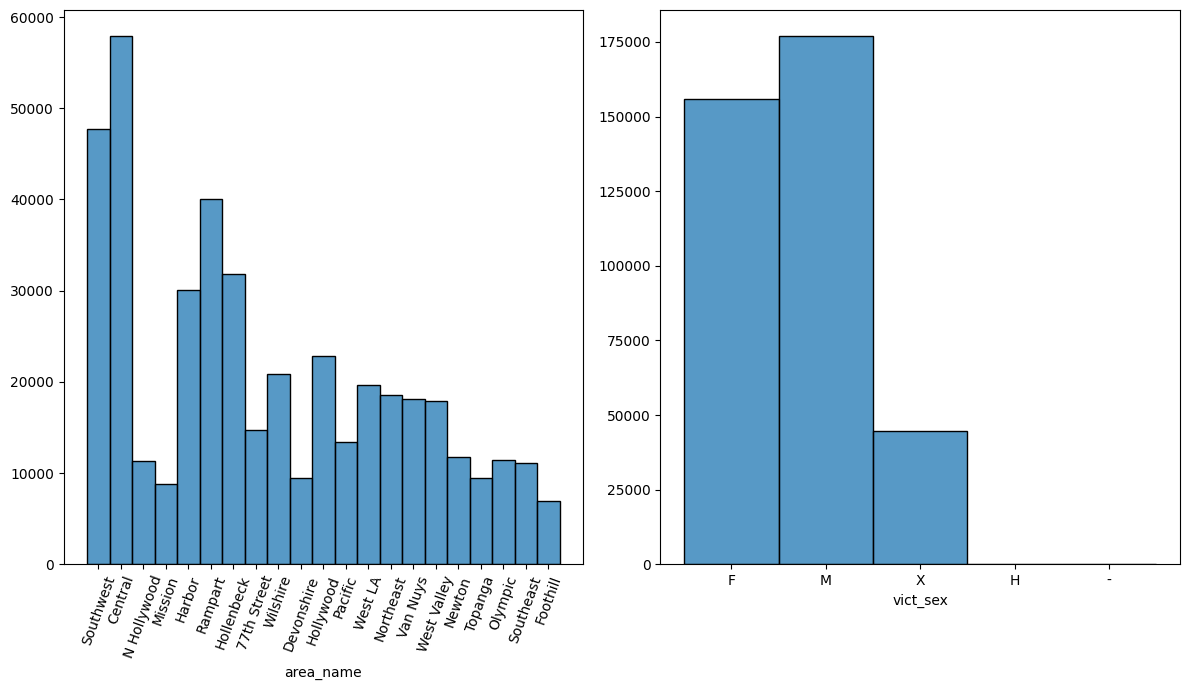

In [133]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1,2, figsize = (12, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "area_name").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=70)
#sns.boxplot(ax = axis[1, 0], data = total_data, x = "area_name")#.set(xlabel = None)
#axis[1,0].tick_params(axis='x', rotation=70)
sns.histplot(ax = axis[1], data = total_data, x = "vict_sex").set(ylabel = None)
#sns.boxplot(ax = axis[1, 1], data = total_data, x = "vict_sex")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [134]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433936 entries, 0 to 433935
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date_occ      433936 non-null  object 
 1   time_occ      433936 non-null  int64  
 2   area_name     433936 non-null  object 
 3   rpt_dist_no   433936 non-null  int64  
 4   crm_cd_desc   433936 non-null  object 
 5   mocodes       374863 non-null  object 
 6   vict_age      433936 non-null  int64  
 7   vict_sex      377464 non-null  object 
 8   vict_descent  377461 non-null  object 
 9   premis_desc   433651 non-null  object 
 10  weapon_desc   154873 non-null  object 
 11  status_desc   433936 non-null  object 
 12  location      433936 non-null  object 
 13  lat           433936 non-null  float64
 14  lon           433936 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 49.7+ MB


In [135]:
import datetime
total_data['date_occ'] = pd.to_datetime(total_data['date_occ']).dt.date
total_data["date_occ"] = pd.to_datetime(total_data["date_occ"])

In [136]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433936 entries, 0 to 433935
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      433936 non-null  datetime64[ns]
 1   time_occ      433936 non-null  int64         
 2   area_name     433936 non-null  object        
 3   rpt_dist_no   433936 non-null  int64         
 4   crm_cd_desc   433936 non-null  object        
 5   mocodes       374863 non-null  object        
 6   vict_age      433936 non-null  int64         
 7   vict_sex      377464 non-null  object        
 8   vict_descent  377461 non-null  object        
 9   premis_desc   433651 non-null  object        
 10  weapon_desc   154873 non-null  object        
 11  status_desc   433936 non-null  object        
 12  location      433936 non-null  object        
 13  lat           433936 non-null  float64       
 14  lon           433936 non-null  float64       
dtypes: datetime64[ns]

In [137]:
valores_nulos = total_data['vict_sex'].isnull().sum()
valores_nulos

56472

In [138]:
total_data['vict_sex'].value_counts()

vict_sex
M    176863
F    155883
X     44679
H        38
-         1
Name: count, dtype: int64

In [139]:
total_data=total_data.loc[(total_data['vict_sex']=='M')|(total_data['vict_sex']=='F')|(total_data['vict_sex']=='X')|(total_data['vict_sex'].isnull())]

In [140]:
total_data['vict_sex'].value_counts()

vict_sex
M    176863
F    155883
X     44679
Name: count, dtype: int64

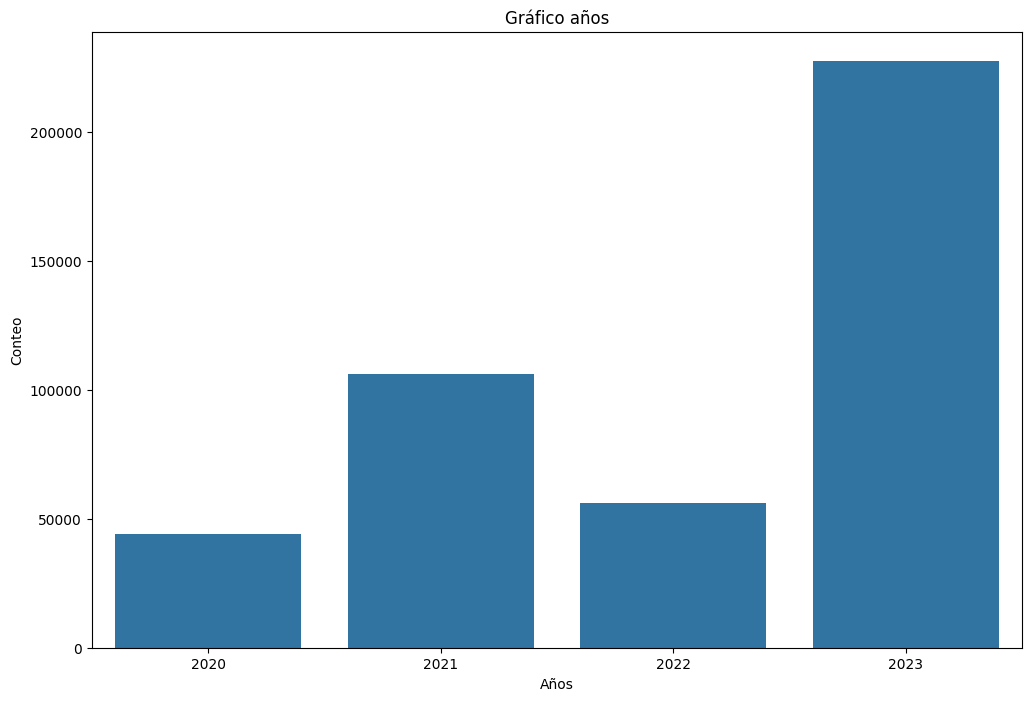

In [141]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=total_data["date_occ"].dt.year.value_counts().index, 
                 y=total_data["date_occ"].dt.year.value_counts())

# Configurar etiquetas y título
plt.xlabel('Años')
plt.ylabel('Conteo')
plt.title('Gráfico años')

# Mostrar el gráfico
plt.show()

In [142]:
delitos=total_data.value_counts("crm_cd_desc")[0:20]
delitos=pd.DataFrame(delitos)
delitos.head(5)

,count
crm_cd_desc,
VEHICLE - STOLEN,45699
BATTERY - SIMPLE ASSAULT,37054
BURGLARY FROM VEHICLE,28201
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",27128
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25645


C:\Users\user\AppData\Local\Temp\ipykernel_10400\3918333898.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


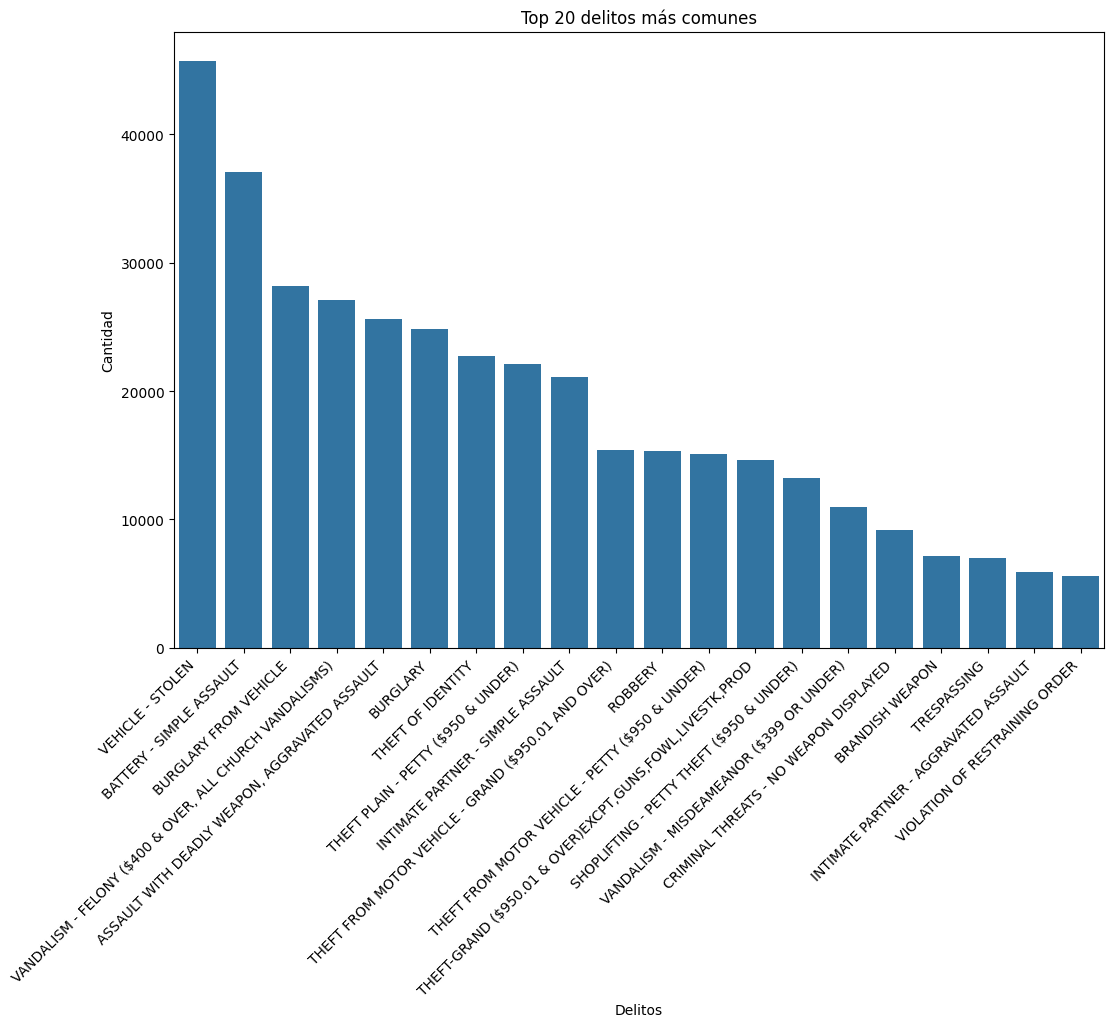

In [143]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=delitos.index, y=delitos['count'], data=delitos)
#ax.set_xticks([])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


# Configurar etiquetas y título
plt.xlabel('Delitos')
plt.ylabel('Cantidad')
plt.title('Top 20 delitos más comunes')

# Mostrar el gráfico
plt.show()

In [144]:
hours=total_data.value_counts("time_occ")#[0:20]
hours=pd.DataFrame(hours)
hours.head(5)

,count
time_occ,
1200,13222
1800,11334
1700,10576
2000,10424
1900,9730


In [145]:
hours=hours.sort_index()

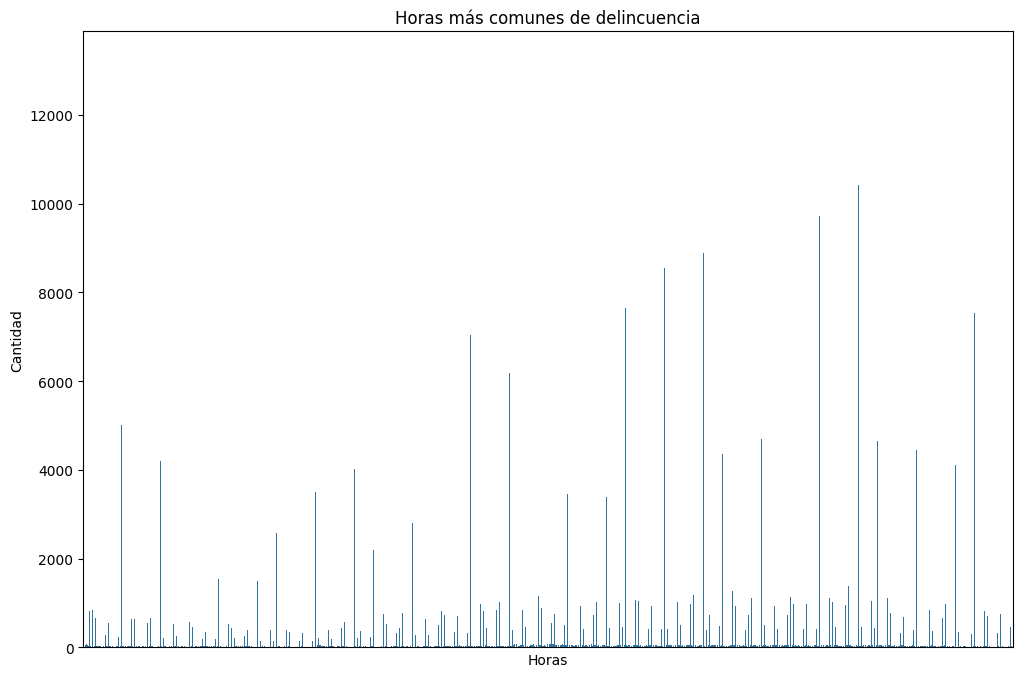

In [146]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=hours.index, y=hours['count'], data=hours)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xticks([])
# Configurar etiquetas y título
plt.xlabel('Horas')
plt.ylabel('Cantidad')
plt.title('Horas más comunes de delincuencia')

# Mostrar el gráfico
plt.show()

In [147]:
rpt_codes=total_data.value_counts("rpt_dist_no")[0:20]
rpt_codes.head(5)

rpt_dist_no
162    4553
182    4015
111    3294
152    2607
153    2528
Name: count, dtype: int64

In [148]:
rpt_codes=pd.DataFrame(rpt_codes)
rpt_codes.head(5)

,count
rpt_dist_no,
162,4553
182,4015
111,3294
152,2607
153,2528


C:\Users\user\AppData\Local\Temp\ipykernel_10400\3524340919.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


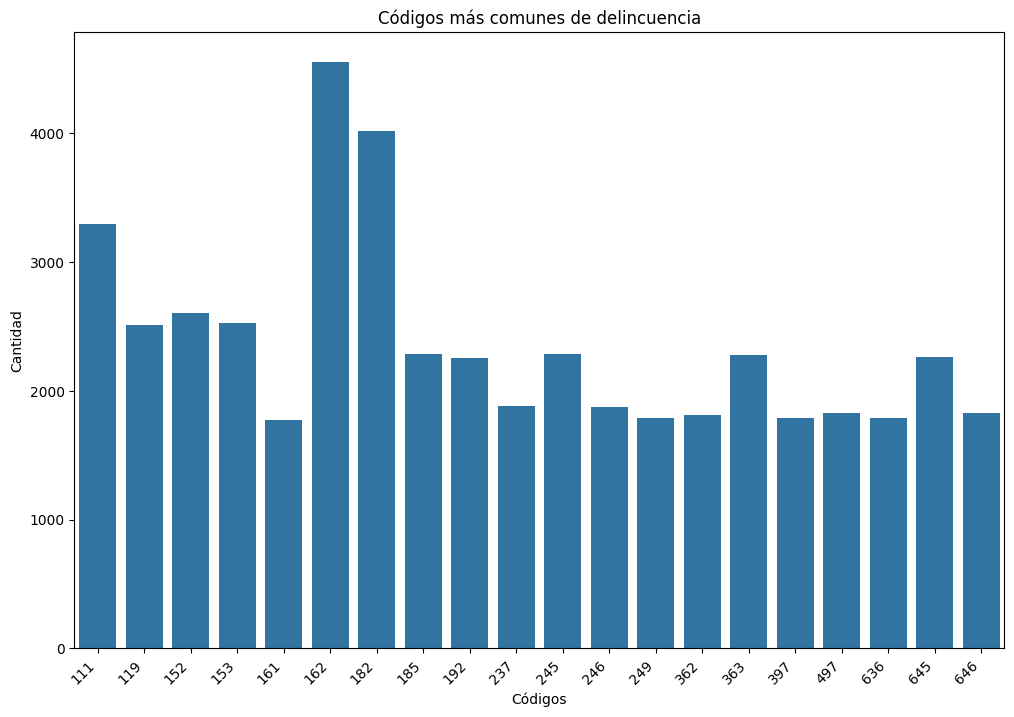

In [149]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=rpt_codes.index, y=rpt_codes['count'], data=rpt_codes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
#ax.set_xticks([])
# Configurar etiquetas y título
plt.xlabel('Códigos')
plt.ylabel('Cantidad')
plt.title('Códigos más comunes de delincuencia')

# Mostrar el gráfico
plt.show()

<Axes: xlabel='vict_age'>

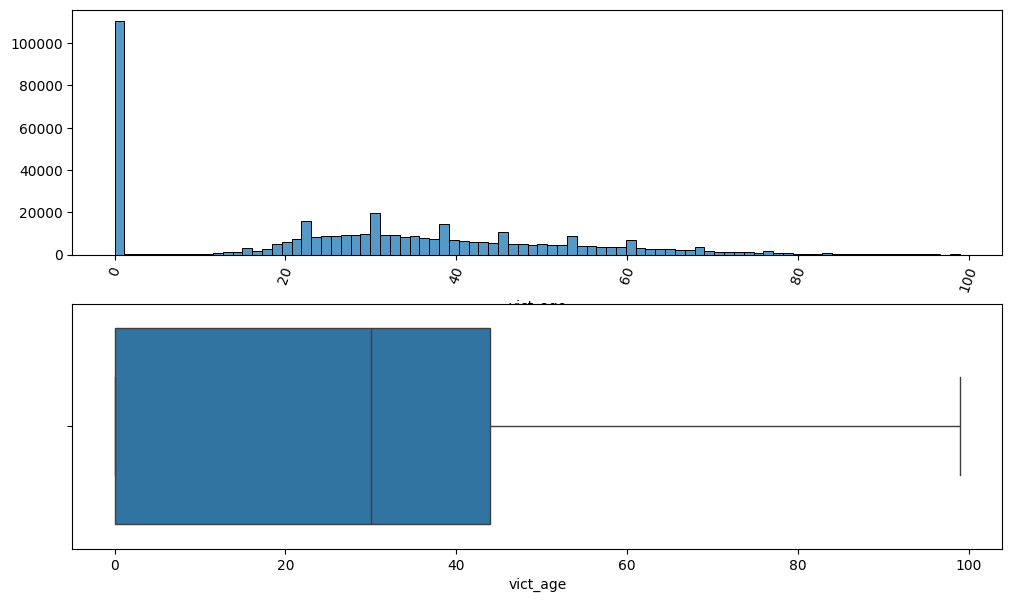

In [150]:
fig, axis = plt.subplots(2,1, figsize = (12, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "vict_age").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=70)
sns.boxplot(ax = axis[1], data = total_data, x = "vict_age")#.set(xlabel = None)

<Axes: xlabel='date_occ'>

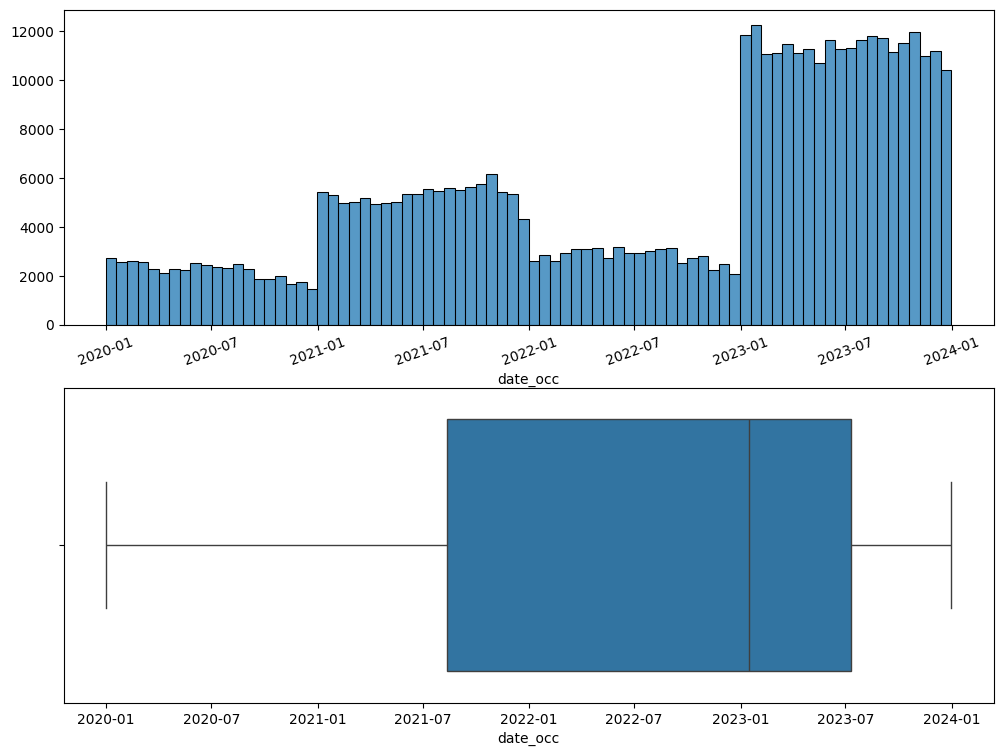

In [151]:
fig, axis = plt.subplots(2,1, figsize = (12, 9))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "date_occ").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=20)
sns.boxplot(ax = axis[1], data = total_data, x = "date_occ")#.set(xlabel = None)

In [152]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433897 entries, 0 to 433935
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      433897 non-null  datetime64[ns]
 1   time_occ      433897 non-null  int64         
 2   area_name     433897 non-null  object        
 3   rpt_dist_no   433897 non-null  int64         
 4   crm_cd_desc   433897 non-null  object        
 5   mocodes       374824 non-null  object        
 6   vict_age      433897 non-null  int64         
 7   vict_sex      377425 non-null  object        
 8   vict_descent  377422 non-null  object        
 9   premis_desc   433612 non-null  object        
 10  weapon_desc   154860 non-null  object        
 11  status_desc   433897 non-null  object        
 12  location      433897 non-null  object        
 13  lat           433897 non-null  float64       
 14  lon           433897 non-null  float64       
dtypes: datetime64[ns](1), 

In [153]:
descent=total_data.value_counts("vict_descent")[0:20]
descent=pd.DataFrame(descent)
descent.head()

,count
vict_descent,
H,134284
W,82134
B,62354
X,48055
O,32125


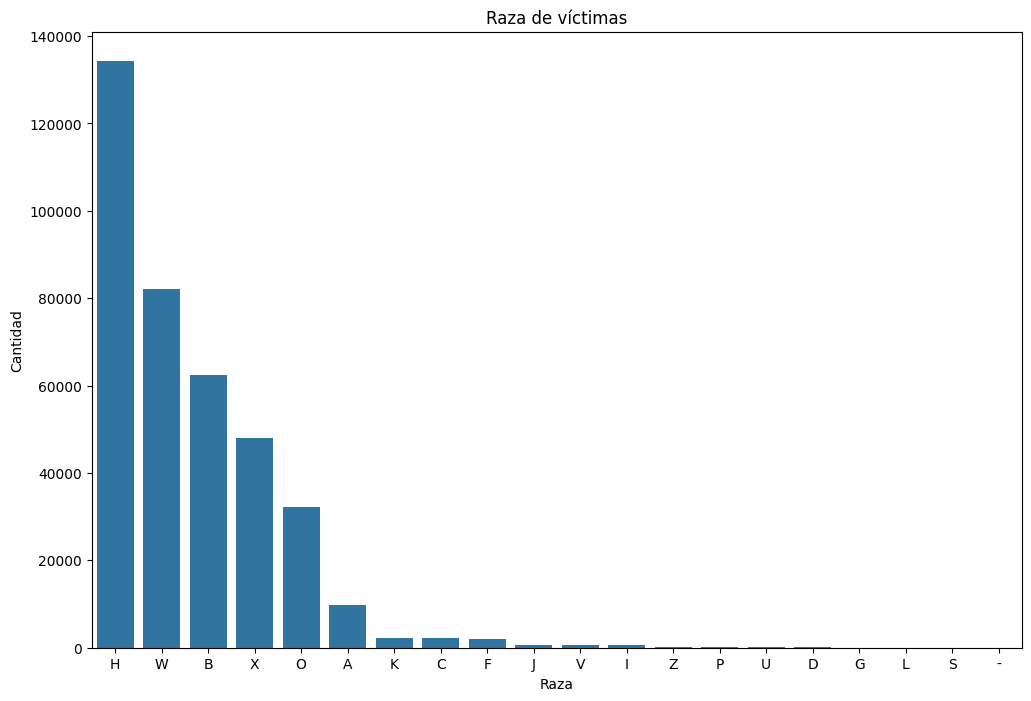

In [154]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=descent.index, y=descent['count'], data=descent)

# Configurar etiquetas y título
plt.xlabel('Raza')
plt.ylabel('Cantidad')
plt.title('Raza de víctimas')

# Mostrar el gráfico
plt.show()

In [155]:
weapon_desc=total_data.value_counts("weapon_desc")[0:20]
weapon_desc=pd.DataFrame(weapon_desc)
weapon_desc.head(10)

,count
weapon_desc,
"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",82486
UNKNOWN WEAPON/OTHER WEAPON,17572
VERBAL THREAT,11286
HAND GUN,9745
KNIFE WITH BLADE 6INCHES OR LESS,3371
OTHER KNIFE,3170
SEMI-AUTOMATIC PISTOL,2976
UNKNOWN FIREARM,2906
MACE/PEPPER SPRAY,1936


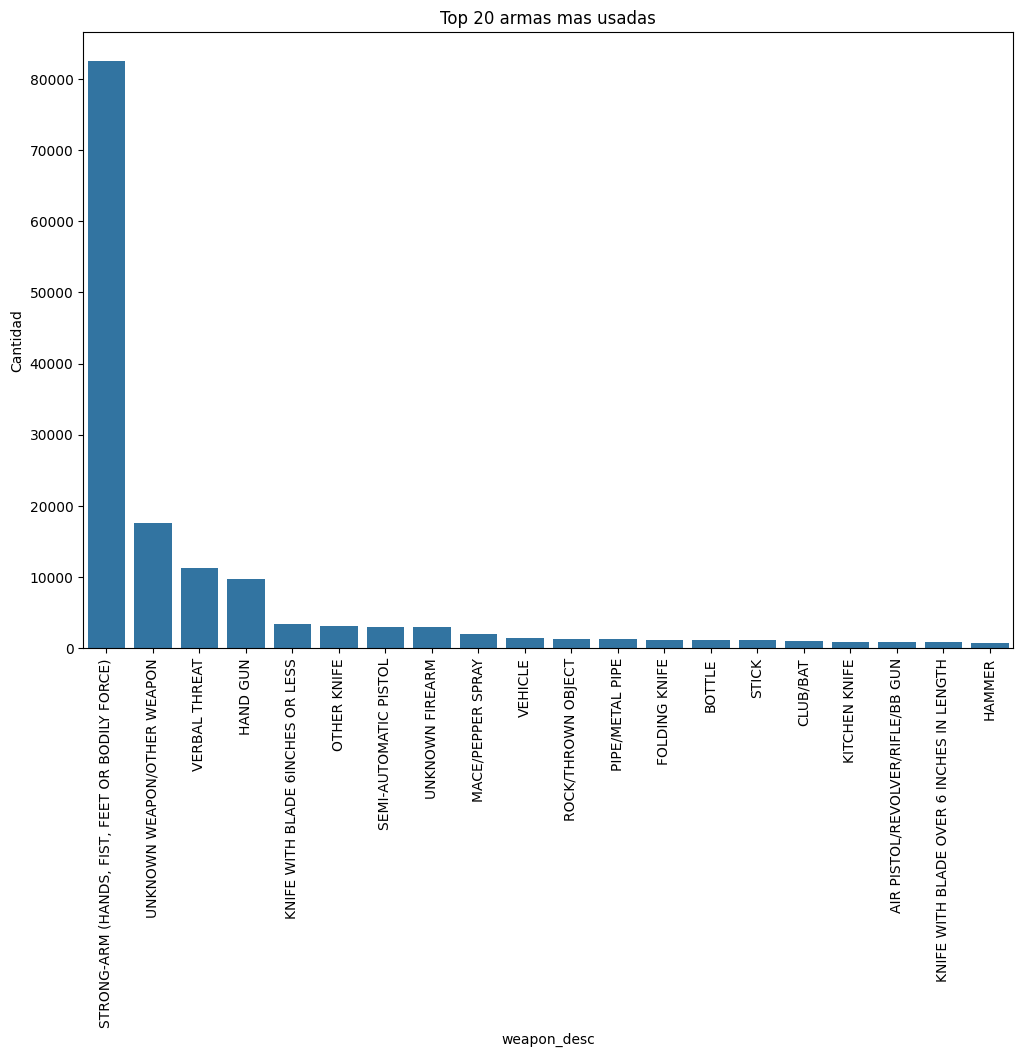

In [156]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=weapon_desc.index, y=weapon_desc['count'], data=weapon_desc)
plt.tick_params(axis = "x", labelrotation=90)

# Configurar etiquetas y título
plt.xlabel('weapon_desc')
plt.ylabel('Cantidad')
plt.title('Top 20 armas mas usadas')

# Mostrar el gráfico
plt.show()

In [157]:
is_weapon=total_data["weapon_desc"].isnull().value_counts()
is_weapon#.value_counts()

weapon_desc
True     279037
False    154860
Name: count, dtype: int64

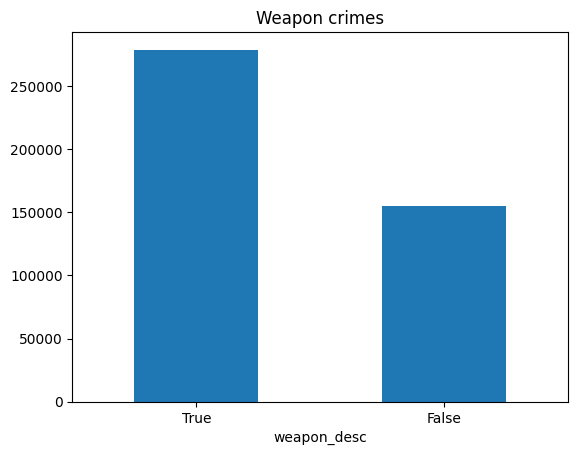

In [158]:
is_weapon.plot(kind='bar',rot=0, title='Weapon crimes')
plt.show()

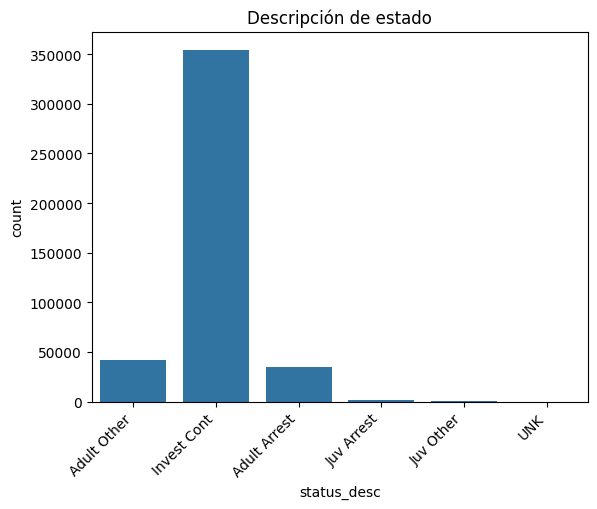

In [159]:
sns.countplot(x='status_desc', data=total_data)
plt.xticks(rotation=45, ha='right')
plt.title('Descripción de estado')
plt.show()

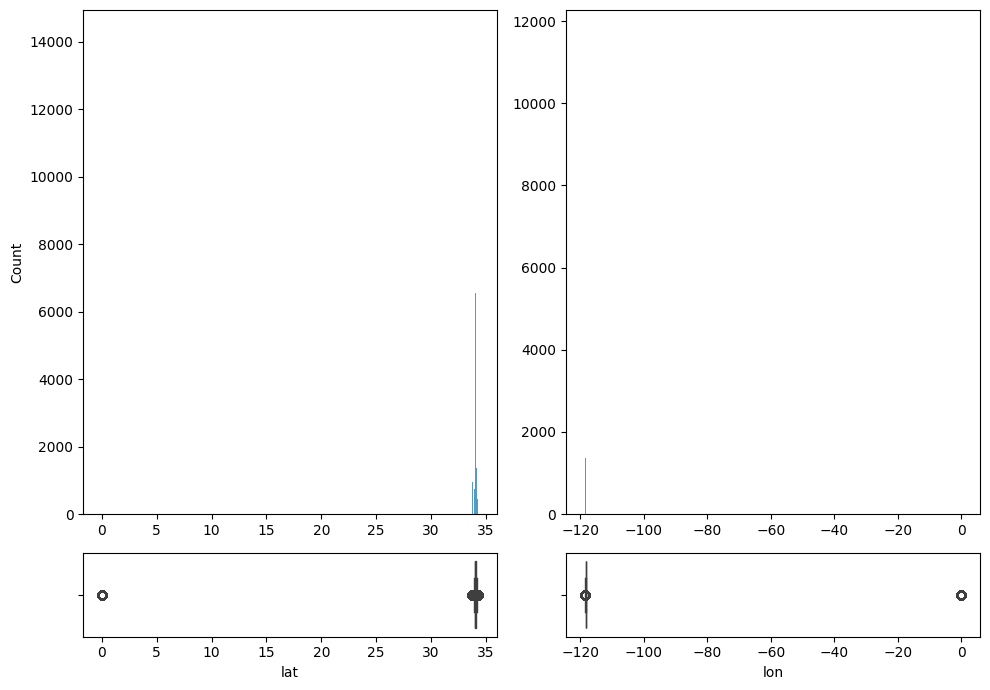

In [160]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "lat").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "lat")
sns.histplot(ax = axis[0, 1], data = total_data, x = "lon").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "lon")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [161]:
total_data=total_data.loc[(total_data['lat'] > 0) & (total_data['lat'] > 0)]
total_data.head()

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon
0,2020-01-08,2230,Southwest,377,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,2020-01-01,330,Central,163,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,2020-02-13,1200,Central,155,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,2020-01-01,1730,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,2020-01-01,415,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,NaN,Invest Cont,14400 TITUS ST,34.2198,-118.4468


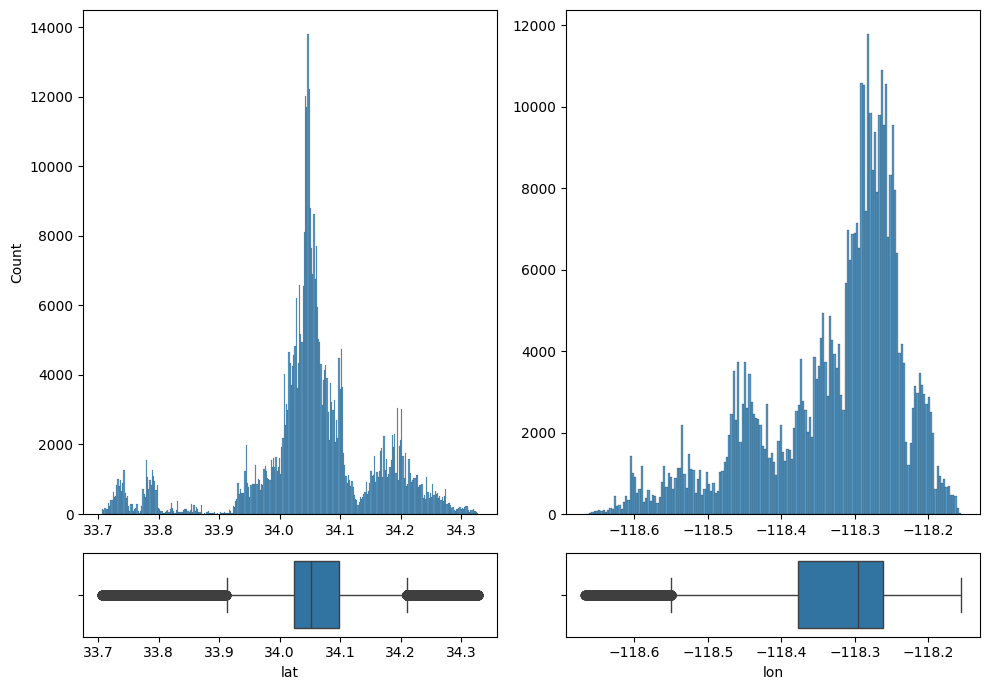

In [162]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "lat").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "lat")
sns.histplot(ax = axis[0, 1], data = total_data, x = "lon").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "lon")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

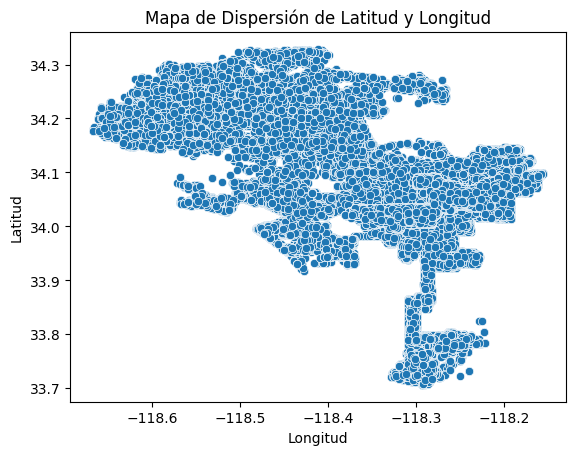

In [163]:
sns.scatterplot(x=total_data['lon'], y=total_data['lat'], data=total_data)
plt.title('Mapa de Dispersión de Latitud y Longitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [170]:
total_data["date_occ"]

0        2020-01-08
1        2020-01-01
2        2020-02-13
3        2020-01-01
4        2020-01-01
            ...    
433931   2023-11-09
433932   2023-12-19
433933   2023-07-08
433934   2023-07-01
433935   2023-11-09
Name: date_occ, Length: 432925, dtype: datetime64[ns]

In [172]:
columna_dia=total_data["date_occ"].apply(lambda x:x.strftime("%A"))
columna_mes=total_data["date_occ"].apply(lambda x:x.strftime("%B"))

In [174]:
total_data['month']=columna_mes
total_data['weekday']=columna_dia

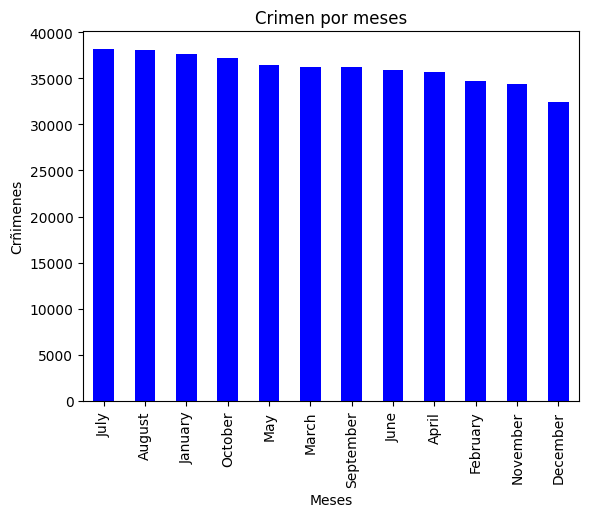

In [182]:
meses=total_data['month'].value_counts()
meses.plot(kind='bar', color='blue')
plt.xlabel('Meses')
plt.ylabel('Crñimenes')
plt.title('Crimen por meses')
plt.show()

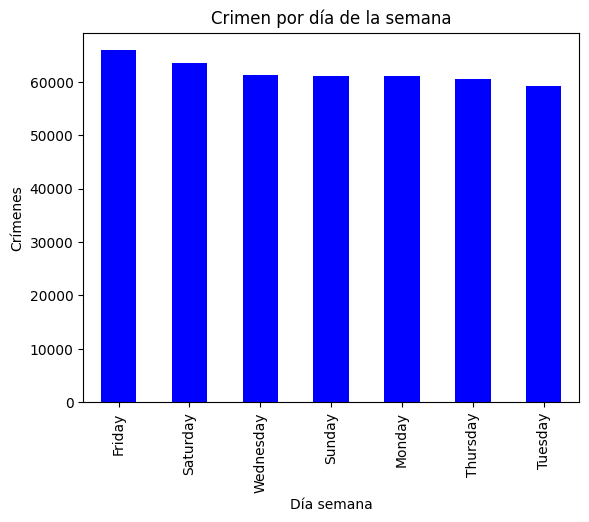

In [181]:
meses=total_data['weekday'].value_counts()
meses.plot(kind='bar', color='blue')
plt.xlabel('Día semana')
plt.ylabel('Crímenes')
plt.title('Crimen por día de la semana')
plt.show()

In [167]:
mocodes=total_data['mocodes'].str.split(" ")

In [168]:
mocodes.head()

0          [0444, 0913]
1    [0416, 1822, 1414]
2                [1501]
3          [0329, 1402]
4                [0329]
Name: mocodes, dtype: object

In [176]:
frecuencias = mocodes.apply(pd.Series).stack().value_counts()

In [186]:
frecuencias=frecuencias[0:20]

In [ ]:
# cosa=mocodes.apply(pd.Series).stack()


In [ ]:
# cosa.head()#.value_counts()

In [ ]:
# total_data.iloc[1]

In [184]:
import seaborn as sns

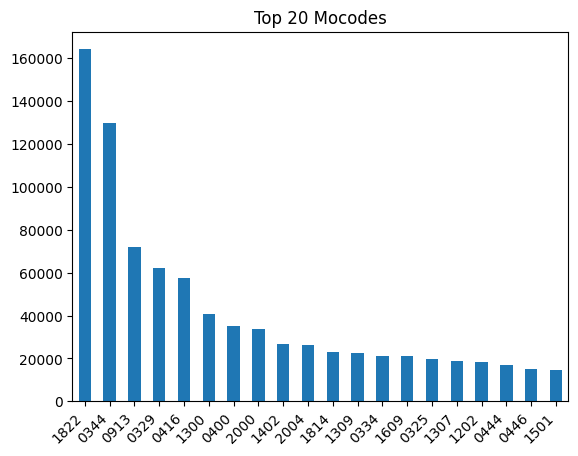

In [188]:
import matplotlib.pyplot as plt 
import seaborn as sns
frecuencias.plot(kind='bar',rot=0, title='Top 20 Mocodes')
plt.xticks(rotation=45, ha='right')
plt.show()

# Análisis multivariante

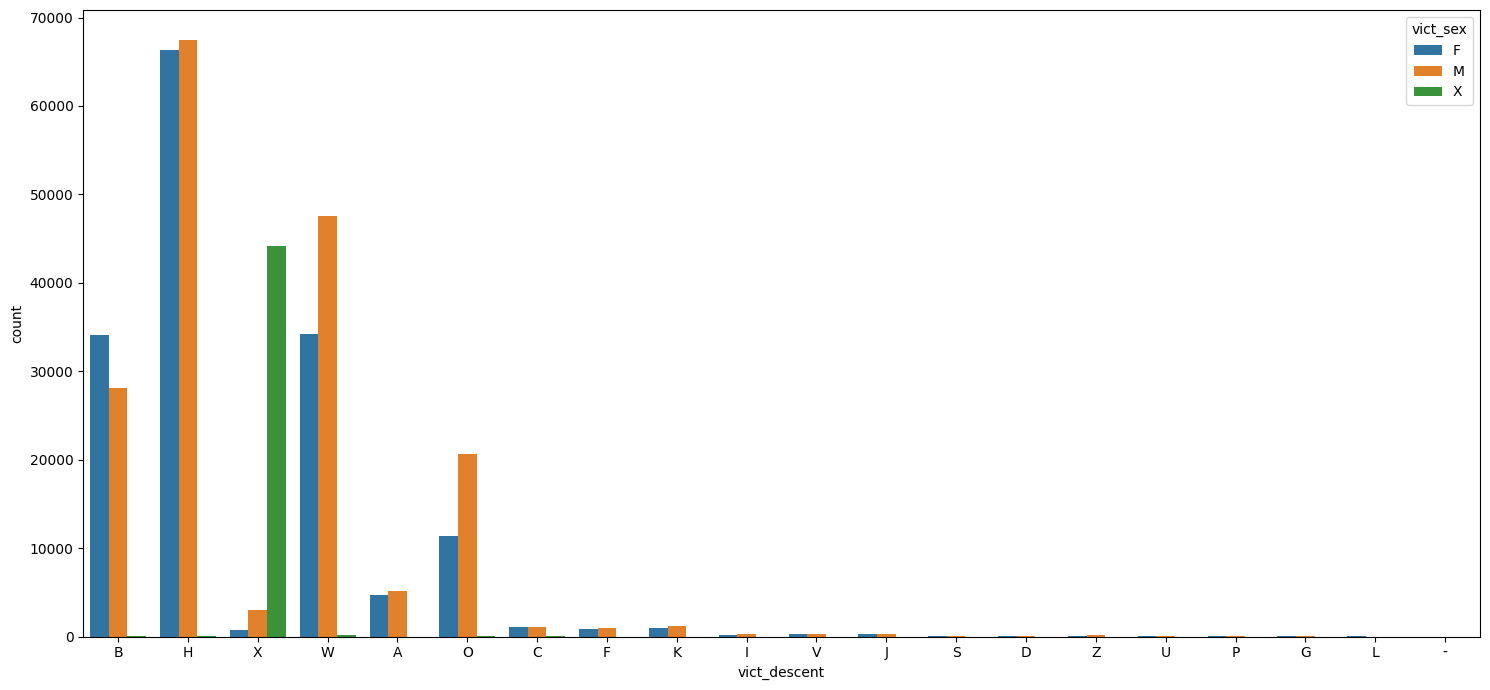

In [190]:
fig, axis = plt.subplots(1, figsize = (15, 7))

sns.countplot( data = total_data, x = "vict_descent", hue = "vict_sex")



plt.tight_layout()
#fig.delaxes(axis[1, 2])

plt.show()

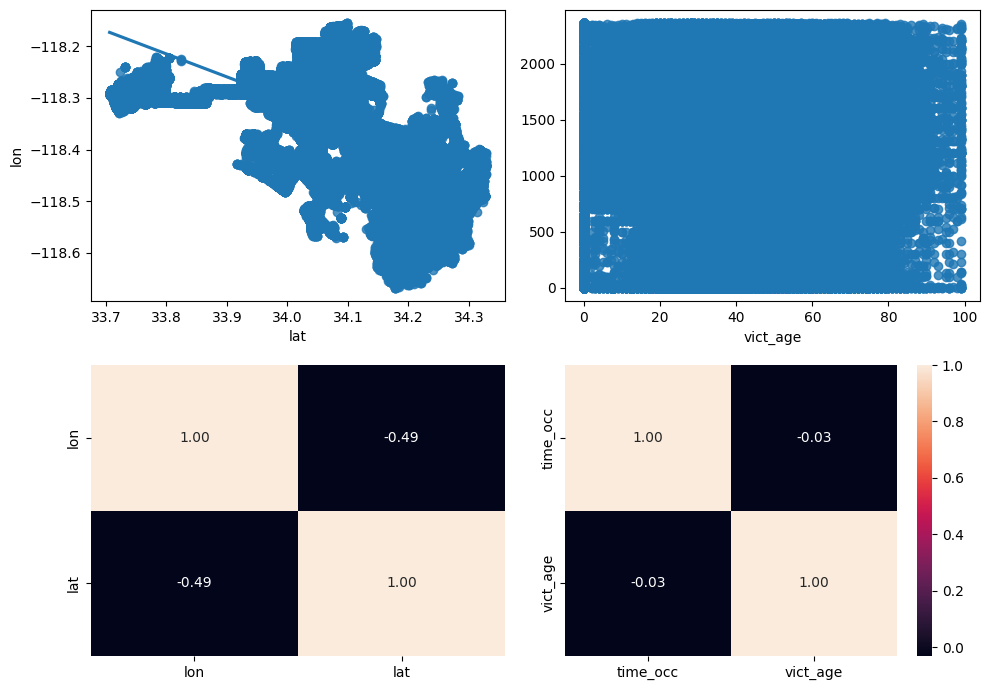

In [192]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "lat", y = "lon")
sns.heatmap(total_data[["lon", "lat"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "vict_age", y = "time_occ").set(ylabel=None)
sns.heatmap(total_data[["time_occ", "vict_age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

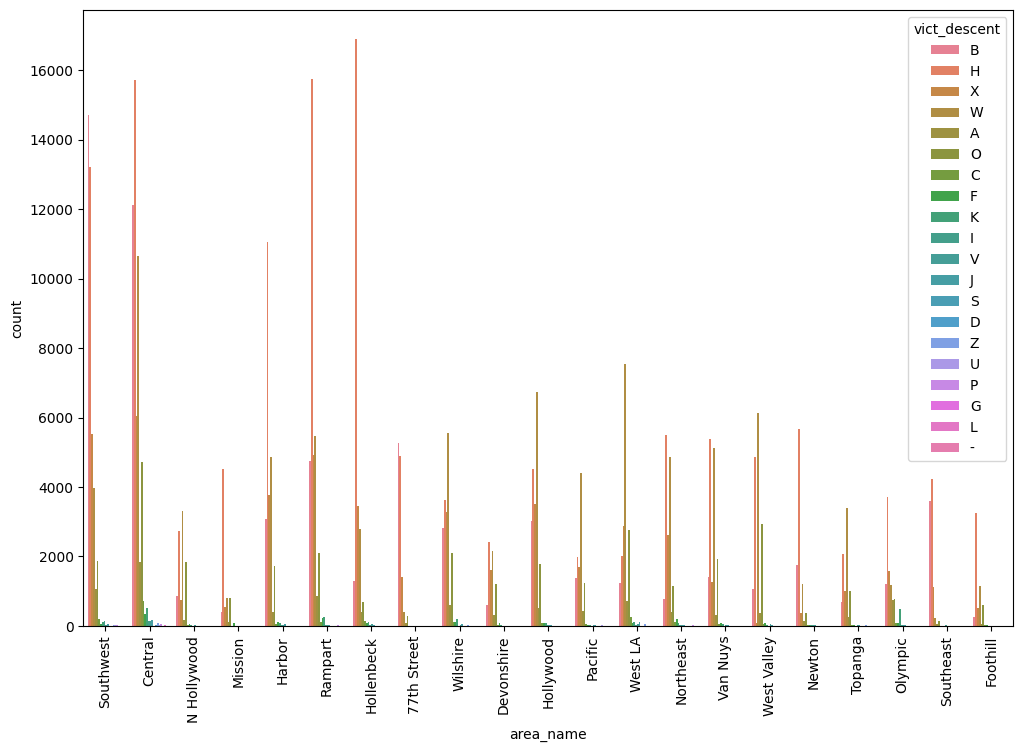

In [193]:
plt.figure(figsize=(12, 8))
# Create a multiple scatter diagram
sns.countplot( data = total_data, x = "area_name", hue = "vict_descent")
plt.tick_params(axis = "x", labelrotation=90)
# Show the plot
plt.show()

In [217]:
str_columns=total_data.select_dtypes(include='object').columns

In [225]:
str_columns

Index(['area_name', 'crm_cd_desc', 'mocodes', 'vict_sex', 'vict_descent',
       'premis_desc', 'weapon_desc', 'status_desc', 'location', 'month',
       'weekday'],
      dtype='object')

In [222]:
lst=[pd.factorize(total_data[i])[0] for i in str_columns]
lst

[array([0, 1, 1, ..., 1, 1, 0], dtype=int64),
 array([ 0,  0,  1, ..., 17, 72, 64], dtype=int64),
 array([    0,     1,     2, ..., 27348,   676,  2801], dtype=int64),
 array([0, 1, 2, ..., 1, 0, 1], dtype=int64),
 array([0, 1, 2, ..., 3, 1, 3], dtype=int64),
 array([0, 1, 2, ..., 0, 5, 0], dtype=int64),
 array([ 0,  1, -1, ...,  0, -1, -1], dtype=int64),
 array([0, 1, 2, ..., 0, 1, 1], dtype=int64),
 array([   0,    1,    2, ...,  293,  159, 4040], dtype=int64),
 array([0, 0, 1, ..., 8, 8, 6], dtype=int64),
 array([0, 0, 1, ..., 2, 2, 1], dtype=int64)]

In [265]:
columnas_factorizadas = {i: dict(zip(total_data[i], pd.factorize(total_data[i])[0])) for i in str_columns}

In [279]:
resultados_json = pd.Series(columnas_factorizadas).to_json(indent=2)

with open('../data/interim/fact.json', 'w') as file:
    file.write(resultados_json)

In [268]:
columnas_factorizadas['weekday']

{'Wednesday': 0,
 'Thursday': 1,
 'Saturday': 2,
 'Sunday': 3,
 'Tuesday': 4,
 'Monday': 5,
 'Friday': 6}

In [281]:
x={col:  pd.factorize(total_data[col])[0] for col in str_columns}

In [282]:
x

{'area_name': array([0, 1, 1, ..., 1, 1, 0], dtype=int64),
 'crm_cd_desc': array([ 0,  0,  1, ..., 17, 72, 64], dtype=int64),
 'mocodes': array([    0,     1,     2, ..., 27348,   676,  2801], dtype=int64),
 'vict_sex': array([0, 1, 2, ..., 1, 0, 1], dtype=int64),
 'vict_descent': array([0, 1, 2, ..., 3, 1, 3], dtype=int64),
 'premis_desc': array([0, 1, 2, ..., 0, 5, 0], dtype=int64),
 'weapon_desc': array([ 0,  1, -1, ...,  0, -1, -1], dtype=int64),
 'status_desc': array([0, 1, 2, ..., 0, 1, 1], dtype=int64),
 'location': array([   0,    1,    2, ...,  293,  159, 4040], dtype=int64),
 'month': array([0, 0, 1, ..., 8, 8, 6], dtype=int64),
 'weekday': array([0, 0, 1, ..., 2, 2, 1], dtype=int64)}

In [290]:
sex_fact = pd.factorize(total_data["vict_sex"])
sex_fact

(array([0, 1, 2, ..., 1, 0, 1], dtype=int64),
 Index(['F', 'M', 'X'], dtype='object'))

In [291]:
dict(zip(total_data["vict_sex"], sex_fact[0]))

{'F': 0, 'M': 1, 'X': 2, nan: -1}

In [270]:
columnas_factorizadas#['month']

dict

In [262]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432925 entries, 0 to 433935
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      432925 non-null  datetime64[ns]
 1   time_occ      432925 non-null  int64         
 2   area_name     432925 non-null  object        
 3   rpt_dist_no   432925 non-null  int64         
 4   crm_cd_desc   432925 non-null  object        
 5   mocodes       373878 non-null  object        
 6   vict_age      432925 non-null  int64         
 7   vict_sex      376467 non-null  object        
 8   vict_descent  376464 non-null  object        
 9   premis_desc   432640 non-null  object        
 10  weapon_desc   154443 non-null  object        
 11  status_desc   432925 non-null  object        
 12  location      432925 non-null  object        
 13  lat           432925 non-null  float64       
 14  lon           432925 non-null  float64       
 15  month         432925 n

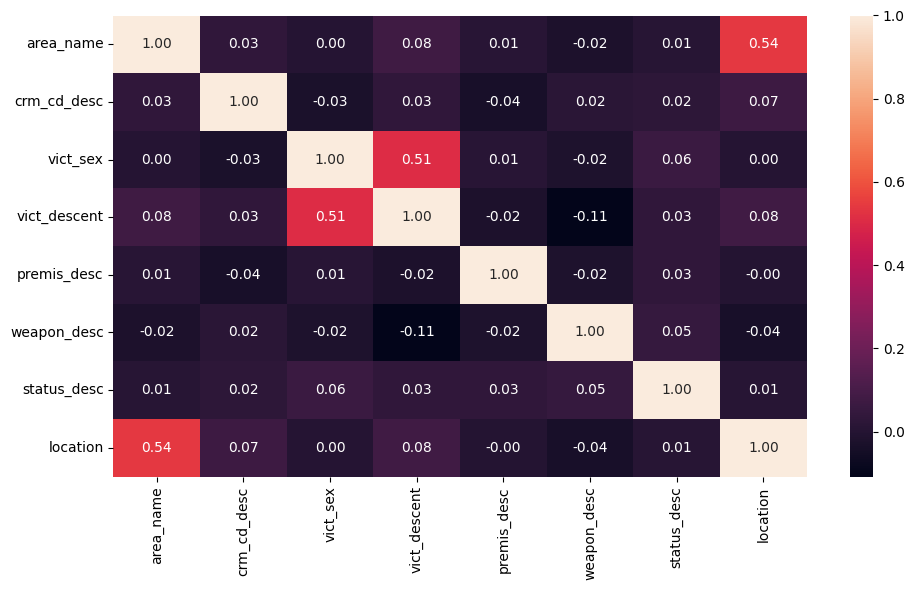

In [ ]:
total_data["area_name"] = pd.factorize(total_data["area_name"])[0]
total_data["crm_cd_desc"] = pd.factorize(total_data["crm_cd_desc"])[0]
total_data["vict_sex"] = pd.factorize(total_data["vict_sex"])[0]
total_data["vict_descent"] = pd.factorize(total_data["vict_descent"])[0]
total_data["premis_desc"] = pd.factorize(total_data["premis_desc"])[0]
total_data["weapon_desc"] = pd.factorize(total_data["weapon_desc"])[0]
total_data["status_desc"] = pd.factorize(total_data["status_desc"])[0]
total_data["location"] = pd.factorize(total_data["location"])[0]


fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[['area_name', 'crm_cd_desc', 'vict_sex', 'vict_descent',
       'premis_desc', 'weapon_desc', 'status_desc', 'location']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [ ]:
columns=total_data.columns
columns

Index(['date_occ', 'time_occ', 'area_name', 'rpt_dist_no', 'crm_cd_desc',
       'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'lat', 'lon'],
      dtype='object')

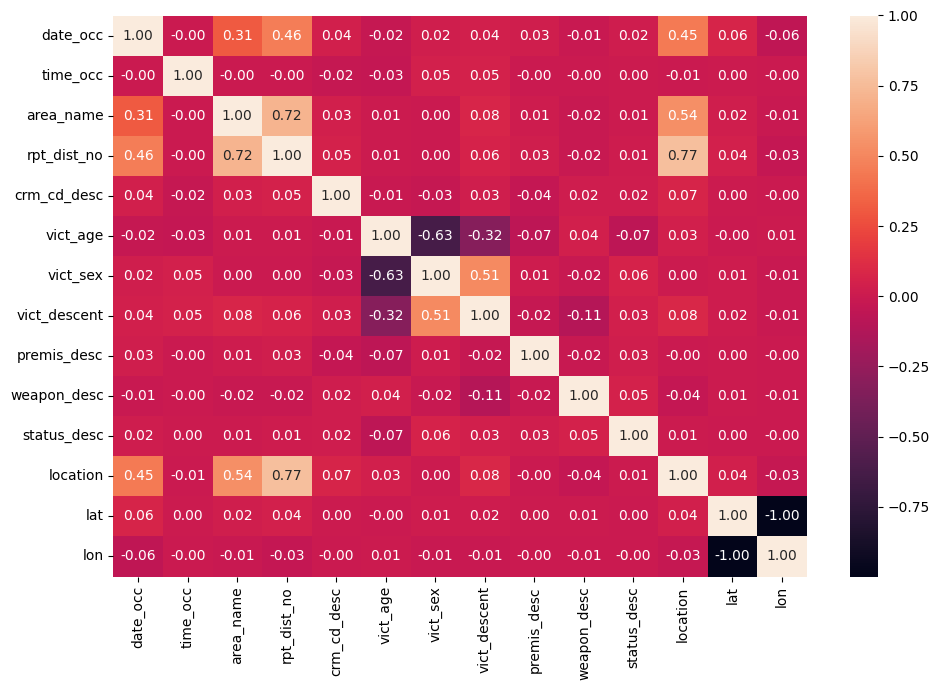

In [ ]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[['date_occ', 'time_occ', 'area_name', 'rpt_dist_no', 'crm_cd_desc',
        'vict_age', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'lat', 'lon']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [ ]:
total_data['crm_cd_desc']

0          0
1          0
2          1
3          2
4          3
          ..
433931     8
433932    38
433933    17
433934    72
433935    64
Name: crm_cd_desc, Length: 433936, dtype: int64